In [2]:
# Data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [3]:
# Load the training and testing datasets into Pandas DataFrames
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (891, 12)
Test shape: (418, 11)


In [4]:
# For simplicity, I will combine the train and test data sets.
combined = pd.concat([train, test])
combined.info()
print("_"*60)

# Percentage of missing values
(combined.isnull().sum()/len(combined)*100).sort_values(ascending=False).round(2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
____________________________________________________________


Cabin          77.46
Survived       31.93
Age            20.09
Embarked        0.15
Fare            0.08
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
dtype: float64

In [5]:
# Show statistics for numerical features
combined.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
# Show statistics for categorical features
combined.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


# Handling missing values

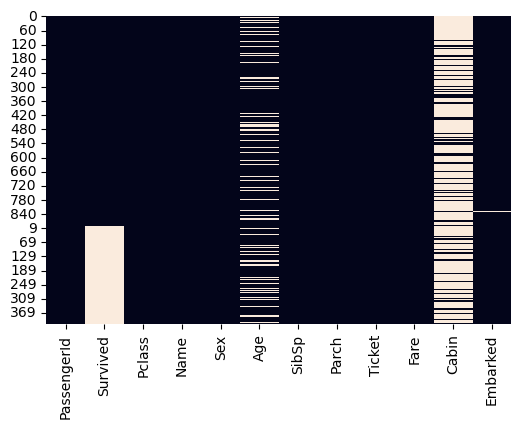

In [7]:
# Show the heat map where we can detect some' missing values.
plt.figure(figsize=(6,4))
sns.heatmap(combined.isnull(), cbar=False)
plt.show()

## 1. Handle missing values of **numerical** features.

### 1.1 Handling the 'Age' column.

In [9]:
# Percentage of missing Age values
age_perc = (combined['Age'].isnull().sum()/len(combined['Age'])*100).round(2)
print(f"Percentage of missing Age values: {age_perc}%")

Percentage of missing Age values: 20.09%


#### We have to think about a strategy by which we will insert the missing age values. For this, let's have a look at the corellation matrix of the data.

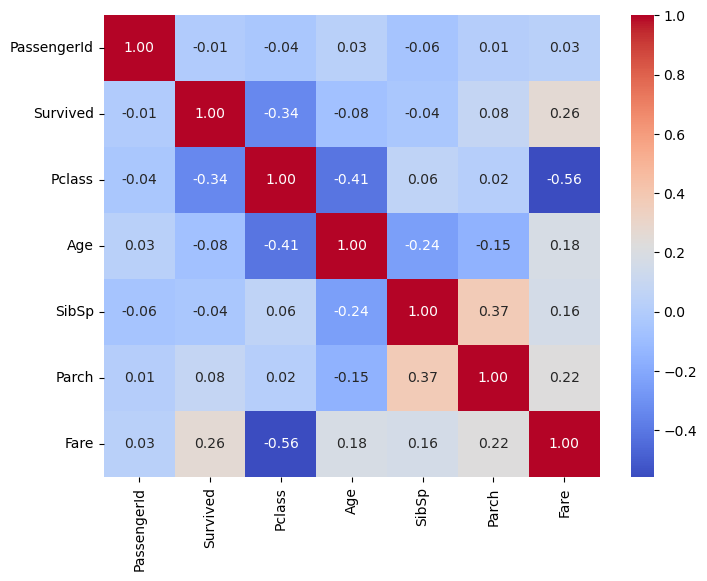

In [10]:
# Calculate correlation matrix
correlation_matrix = combined.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

#### The highest correlation is between 'Age' and 'Pclass'. It means, dependant on the 'Pclass' we will insert a missing age value.

In [11]:
# Age statistic for each 'Pclass'
combined.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,284.0,39.159930,14.548028,0.92,28.0,39.0,50.0,80.0
2,261.0,29.506705,13.638627,0.67,22.0,29.0,36.0,70.0
3,501.0,24.816367,11.958202,0.17,18.0,24.0,32.0,74.0


In [12]:
# Get the mean age for each 'Pclass'
mean_age_by_pclass = combined.groupby('Pclass')['Age'].mean().round()
mean_age_by_pclass

Pclass
1    39.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [13]:
# Look at some rows with missing age value
combined[combined['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [14]:
# Fill missing values based on 'Pclass'
combined['Age'].fillna(combined['Pclass'].map(mean_age_by_pclass), inplace=True)

In [15]:
# Look at some row with inserted value
combined.iloc[[5,17]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S


#### Yuhoo! We are done with the 'Age' column!

In [16]:
# Let's look at the missing percentage of values again.
combined.info()
print("_"*60)

# Missing
combined.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
____________________________________________________________


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 1.2 Handle the next numerical column, 'Fare'. It has only one missing value.

In [17]:
combined.isnull().sum()
# Look at a row where the missing value is hiding.
combined[combined['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


##### Note: The entry is from the test set and thats why Survived is NaN here.

In [18]:
# We saw, there is a negative corellation between 'Pclass' and 'Fare'
combined.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


In [19]:
# The 'Pclass' is 3 for the missing 'Fare' value, so insert the mean of 'Fare' for the 3th class
mean_fare_by_pclass = combined.groupby('Pclass')['Fare'].mean()
combined['Fare'].fillna(mean_fare_by_pclass[3], inplace=True)

In [21]:
# Let's look at the missing values again.
combined.info()
print("_"*60)

# Missing
combined.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
____________________________________________________________


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

#### We are done with the missing numerical values. Let's continue with missing categorical features.

## 2. Handle missing values of **categorical** features.

In [22]:
# Some insights about categorical features
combined.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [25]:
# Percentage of missing values
(combined.isnull().sum()/len(combined)*100).sort_values(ascending=False).round(2)

Cabin          77.46
Survived       31.93
Embarked        0.15
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

### 2.1 Handling the column 'Cabin'

In [26]:
# Just drop it, b.c. it has too many missing values.
combined.drop(['Cabin'], axis=1, inplace=True)

In [27]:
# Missing values
combined.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### 2.2 Handling the column 'Embarked'

In [28]:
# Where are missing values for 'Embarked'?
combined[combined['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [29]:
# What are the distinc values for 'Embarked'?
combined['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
# It seems like we can just insert the value which appeares most of the time.
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)

In [31]:
# Missing values
combined.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

#### Yuhoo! We are done with all the missing values of numerical **and** categorical features.
(Survived are (yet) unknown labels from the test set)

# Handling features with the **object** type.

In [32]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [33]:
# We have object(4). It means 4 features are not numerical.
# Let's look at the data again
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
# Sex should be easy to handle. Convert it to numerical feature.
combined.replace({'Sex': {'male': 1, 'female': 0}}, inplace=True)

In [35]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [36]:
combined['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [37]:
combined.replace({'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [38]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [39]:
# We still have object column (Name)
# The object column "Name" is (in this version of notebook) not necessery, so we can drop it. Althou it may contain useful information.
combined.drop(['Name'], axis=1, inplace=True)

In [40]:
# Since it is my first attempt, I will also just drop the Tickets column.
combined.drop(['Ticket'], axis=1, inplace=True)

In [41]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 102.3 KB


Survived       1.000000
Fare           0.257307
Embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.049633
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


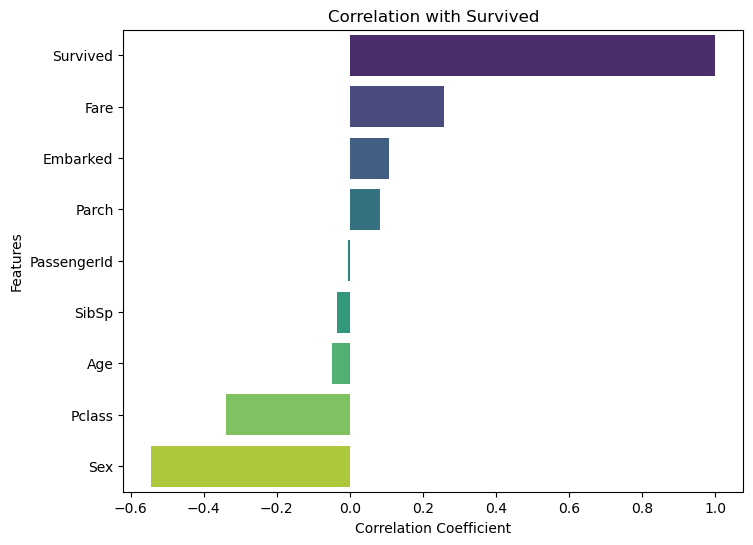

In [42]:
"""
Nice we only have 2 kind of dtypes: float64(3), int64(6).
Now we can look wich columns have which corellations with the 
target column "Survived".
"""

# Calculate correlation with 'Survived'
correlation_with_survived = combined.corr()['Survived'].sort_values(ascending=False)

# Print or visualize the sorted correlation values
print(correlation_with_survived)

# If you want to create a bar plot for better visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_survived.values, y=correlation_with_survived.index, palette='viridis')
plt.title('Correlation with Survived')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [43]:
# Divide the combined version back into train and test dataset:
df_train = combined[:len(train)]
df_test = combined[len(train):]

df_train = df_train.astype({'Survived': int})

In [44]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [45]:
df_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,NaN,3,1,34.5,0,0,7.8292,2
1,893,NaN,3,0,47.0,1,0,7.0000,0
2,894,NaN,2,1,62.0,0,0,9.6875,2
3,895,NaN,3,1,27.0,0,0,8.6625,0
4,896,NaN,3,0,22.0,1,1,12.2875,0


In [46]:
# Now we can separate the train data and train labels
X = df_train.drop(["Survived", "PassengerId"], axis=1)
y = df_train["Survived"]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [47]:
# Nice, we are ready to construct a model using X_train as train set and y_train
# as labels for the train set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((712, 7), (179, 7))

In [48]:
"""
In this example, we use a RandomForestClassifier as a model. 
After splitting the data into training and testing sets, we train the model 
on the training set and evaluate its accuracy on the test set.
"""

# Initialize a model (Random Forest Classifier in this example)
model = RandomForestClassifier(n_estimators=115, max_depth=5, random_state=1)

# Perform cross-validation and get the accuracy scores
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

# Print the accuracy scores for each fold
# print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print(f'Mean Cross-Validation Accuracy: {mean_accuracy}')

# Train the model on the full training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = model.score(X_test, y_test)
print(f'Model Accuracy on Test Set: {test_accuracy}')

Mean Cross-Validation Accuracy: 0.8314358372456964
Model Accuracy on Test Set: 0.8100558659217877


In [49]:
# Preprocess test set used for submission.
df_test = df_test.drop(['Survived', 'PassengerId'], axis=1)
df_test.head()

# Make predictions on the provided test set
predictions = model.predict(df_test)
predictions.shape

(418,)

In [51]:
predictions[:11]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [52]:
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
